## Linear Regression

In [1]:
# Step 1: Import all the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the dataset
dataset = load_boston()

In [4]:
#step 3: Prepare the dataset in the required format
X = dataset.data
Y = dataset.target

In [5]:
#step 4: Split the dataset
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [6]:
# Step 5: Build the model
model = LinearRegression(normalize = True)
model.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [7]:
#Step 6: Predict and evaluate
Y_pred = model.predict(X_test)
Mae_error = MAE(Y_test, Y_pred)
print("MAE error is ", Mae_error)

MAE error is  3.1627098714574013


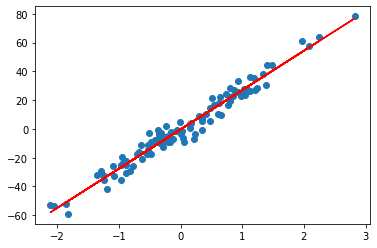

In [9]:
## Visulization
from sklearn.datasets import make_regression
X1, Y1 = make_regression(n_samples=100, n_features = 1,\
                         noise = 5)
model = LinearRegression(normalize = True)
model.fit(X1, Y1)
Y1_pred = model.predict(X1)

plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, 'r-')


In [10]:
from sklearn.model_selection import cross_val_score
model = LinearRegression ()
scores = cross_val_score(model, X, Y, cv = 5, scoring= 'neg_mean_absolute_error' )
-scores.mean()

#from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit


4.249968544192539

## Polynomial Regression

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


In [16]:
#generate the data
def generate_dataset(n_samples):
    
    X = np.abs(np.random.rand(n_samples))
    X = X/np.max(X)
    X = np.sort(X)
    
    Y = np.sin(2*np.pi*X) + np.random.randn(n_samples)/10
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    return(X, Y)

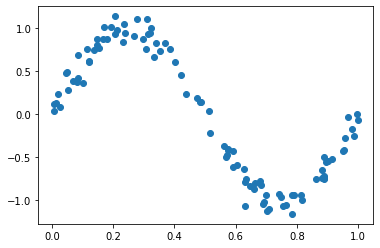

In [17]:
X, Y = generate_dataset(100)
plt.scatter(X, Y)

In [18]:
def generate_features(X, dg):
    model = PolynomialFeatures(degree = dg)
    X_poly = model.fit_transform(X)
    return X_poly

In [22]:
# step 2: generate the data
n = 10
dg =3
X, Y = generate_dataset(n)
X_poly = generate_features(X, dg)

#Split the dataset
X_train, X_test, Y_train, Y_test = \
train_test_split(X_poly, Y, test_size = 0.3, 
                 random_state = 1)

# model buidling
model =  LinearRegression(normalize = True)
model.fit(X_train, Y_train)

#Predict and evaluate
Y_pred = model.predict(X_test)
error = MAE(Y_test, Y_pred)

print("MAE  error  is ", error)

MAE  error  is  0.40759007557342225


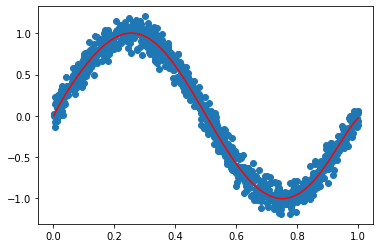

In [25]:
#Visulization
n = 1000
dg = 9
X, Y = generate_dataset(n)
X_poly = generate_features(X, dg)

model =  LinearRegression(normalize = True)
model.fit(X_poly, Y)

#Predict and evaluate
Y_pred = model.predict(X_poly)


plt.scatter(X, Y)
plt.plot(X, Y_pred, 'r-')

In [14]:
#from sklearn.linear_model import Lasso # L1 regularization
#from sklearn.linear_model import Ridge # L2 regularization
#from sklearn.linear_model import ElsticNet # both L1 and L2



### Logistic Regression

In [26]:
## Step 1: Import the required Libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [27]:
#step 2: Read the data
df = pd.read_csv('Student-Pass-Fail-Data.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [28]:
#step 3: Prepare the dataset
X = df.drop('Pass_Or_Fail', axis=1)
Y = df.Pass_Or_Fail

In [29]:
#step 4: Split the dataset
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.2)

In [30]:
#step 5: Build the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
#step 6: predict and evaluate
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

100.0


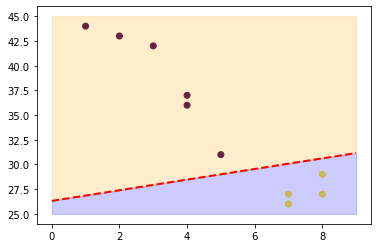

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df.Self_Study_Daily, df.Tution_Monthly, c = Y)

b = model.intercept_[0]
w1, w2 = model.coef_.T

#intercept of the decision boundary
c = -b/w2
# slope of the decision boundary 
m = -w1/w2

xmin, xmax = 0, 9
ymin, ymax = 25, 45

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'r--', lw = 2)
plt.fill_between(xd, yd, ymin, color = 'b', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'orange', alpha = 0.2)